### TRATAMENTO FINAL: demonstrações com df_final e df_final2 e exportação de result_final como amostragem definitiva

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import geopandas as gpd

partida = gpd.read_file('/content/drive/My Drive/dados_mestrado/experimento99/partidafinal99_novo.gpkg') # .reset_index(drop=True) # pd.read_csv('/content/drive/My Drive/dados_mestrado/partida.csv')
chegada = gpd.read_file('/content/drive/My Drive/dados_mestrado/experimento99/chegadafinal99_novo.gpkg') # .reset_index(drop=True) # pd.read_csv('/content/drive/My Drive/dados_mestrado/chegada.csv')

partida.columns

Index(['VehId', 'id', 'datetime', 'lon', 'lat', 'tile_ID', 'tid', 'day',
       'period', 'geometry'],
      dtype='object')

In [3]:
chegada.columns

Index(['VehId', 'id', 'datetime', 'lon', 'lat', 'tile_ID', 'tid', 'day',
       'period', 'geometry'],
      dtype='object')

In [4]:
mtdf1 = partida.merge(chegada, on=['VehId','id'])

mtdf1.columns

Index(['VehId', 'id', 'datetime_x', 'lon_x', 'lat_x', 'tile_ID_x', 'tid_x',
       'day_x', 'period_x', 'geometry_x', 'datetime_y', 'lon_y', 'lat_y',
       'tile_ID_y', 'tid_y', 'day_y', 'period_y', 'geometry_y'],
      dtype='object')

In [5]:
mtdf1['pares'] = mtdf1['tile_ID_x'].astype(str) + '_' + mtdf1['tile_ID_y'].astype(str)

mtdf1

,VehId,id,datetime_x,lon_x,lat_x,tile_ID_x,tid_x,day_x,period_x,geometry_x,datetime_y,lon_y,lat_y,tile_ID_y,tid_y,day_y,period_y,geometry_y,pares
0,128,128_subtraj_1,2017-11-05 03:12:19.415,-83.777014,42.274103,31284,128_subtraj_12017110503,Sunday,Early morning,POINT (-83.77701 42.2741),2017-11-05 04:37:56.441,-83.680319,42.230665,75312,128_subtraj_12017110504,Sunday,Early morning,POINT (-83.68032 42.23066),31284_75312
1,128,128_subtraj_10,2017-11-05 10:14:26.151,-83.682439,42.285142,74545,128_subtraj_102017110510,Sunday,Morning,POINT (-83.68244 42.28514),2017-11-05 11:14:04.567,-83.780762,42.294180,29338,128_subtraj_102017110511,Sunday,Morning,POINT (-83.78076 42.29418),74545_29338
2,128,128_subtraj_11,2017-11-05 11:14:10.123,-83.780208,42.280547,29711,128_subtraj_112017110511,Sunday,Morning,POINT (-83.78021 42.28055),2017-11-05 11:31:04.193,-83.765816,42.263926,36069,128_subtraj_112017110511,Sunday,Morning,POINT (-83.76582 42.26393),29711_36069
3,128,128_subtraj_12,2017-11-05 11:31:09.750,-83.748978,42.277853,43784,128_subtraj_122017110511,Sunday,Morning,POINT (-83.74898 42.27785),2017-11-05 12:44:24.978,-83.780192,42.280284,29711,128_subtraj_122017110512,Sunday,Afternoon,POINT (-83.78019 42.28028),43784_29711
4,128,128_subtraj_13,2017-11-05 12:44:30.534,-83.787927,42.282863,26204,128_subtraj_132017110512,Sunday,Afternoon,POINT (-83.78793 42.28286),2017-11-05 12:50:37.266,-83.801190,42.285184,20908,128_subtraj_132017110512,Sunday,Afternoon,POINT (-83.80119 42.28518),26204_20908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14493,603,603_subtraj_95,2018-11-11 04:50:56.950,-83.801518,42.284850,20542,603_subtraj_952018111104,Sunday,Early morning,POINT (-83.80152 42.28485),2018-11-11 06:34:18.056,-83.771285,42.243419,33628,603_subtraj_952018111106,Sunday,Morning,POINT (-83.77129 42.24342),20542_33628
14494,603,603_subtraj_96,2018-11-11 06:34:23.612,-83.801627,42.284986,20542,603_subtraj_962018111106,Sunday,Morning,POINT (-83.80163 42.28499),2018-11-11 06:39:04.218,-83.788831,42.282967,25818,603_subtraj_962018111106,Sunday,Morning,POINT (-83.78883 42.28297),20542_25818
14495,603,603_subtraj_97,2018-11-11 06:39:09.774,-83.776643,42.284519,31299,603_subtraj_972018111106,Sunday,Morning,POINT (-83.77664 42.28452),2018-11-11 06:47:38.198,-83.752016,42.281506,42163,603_subtraj_972018111106,Sunday,Morning,POINT (-83.75202 42.28151),31299_42163
14496,603,603_subtraj_98,2018-11-11 06:47:43.755,-83.738755,42.229234,48204,603_subtraj_982018111106,Sunday,Morning,POINT (-83.73876 42.22923),2018-11-11 06:55:36.061,-83.739141,42.240790,48221,603_subtraj_982018111106,Sunday,Morning,POINT (-83.73914 42.24079),48204_48221


In [6]:
mtdf1.columns

Index(['VehId', 'id', 'datetime_x', 'lon_x', 'lat_x', 'tile_ID_x', 'tid_x',
       'day_x', 'period_x', 'geometry_x', 'datetime_y', 'lon_y', 'lat_y',
       'tile_ID_y', 'tid_y', 'day_y', 'period_y', 'geometry_y', 'pares'],
      dtype='object')

In [7]:
mtdf1 = mtdf1[['VehId', 'id','pares','tile_ID_x', 'tile_ID_y', 'day_x']]

mtdf1

,VehId,id,pares,tile_ID_x,tile_ID_y,day_x
0,128,128_subtraj_1,31284_75312,31284,75312,Sunday
1,128,128_subtraj_10,74545_29338,74545,29338,Sunday
2,128,128_subtraj_11,29711_36069,29711,36069,Sunday
3,128,128_subtraj_12,43784_29711,43784,29711,Sunday
4,128,128_subtraj_13,26204_20908,26204,20908,Sunday
...,...,...,...,...,...,...
14493,603,603_subtraj_95,20542_33628,20542,33628,Sunday
14494,603,603_subtraj_96,20542_25818,20542,25818,Sunday
14495,603,603_subtraj_97,31299_42163,31299,42163,Sunday
14496,603,603_subtraj_98,48204_48221,48204,48221,Sunday


In [8]:
mtdf1[mtdf1['VehId']==145].sort_values(['tile_ID_x','tile_ID_y'])

,VehId,id,pares,tile_ID_x,tile_ID_y,day_x
734,145,145_subtraj_96,20178_26204,20178,26204,Wednesday
737,145,145_subtraj_99,20178_42157,20178,42157,Wednesday
678,145,145_subtraj_45,20542_21628,20542,21628,Tuesday
657,145,145_subtraj_26,20542_25818,20542,25818,Tuesday
696,145,145_subtraj_61,20542_31284,20542,31284,Tuesday
...,...,...,...,...,...,...
628,145,145_subtraj_152,77480_48219,77480,48219,Thursday
626,145,145_subtraj_150,78321_44599,78321,44599,Thursday
665,145,145_subtraj_33,78321_48209,78321,48209,Tuesday
645,145,145_subtraj_168,78321_68590,78321,68590,Thursday


In [9]:
contar = mtdf1[mtdf1['VehId']==145].sort_values(['tile_ID_x','tile_ID_y','day_x'])

pares_contados = contar.groupby(['tile_ID_x', 'tile_ID_y','day_x']).size().reset_index(name='contagem')

pares_filtrados = pares_contados[pares_contados['contagem'] > 1]

pares_filtrados

,tile_ID_x,tile_ID_y,day_x,contagem
9,20542,38896,Wednesday,2
18,21628,36069,Tuesday,3
21,21628,38896,Tuesday,5
22,21628,38896,Wednesday,4
40,33665,38896,Tuesday,2
41,33665,38896,Wednesday,2
55,36472,21628,Wednesday,5
57,36472,31283,Tuesday,2
73,38896,21628,Thursday,2
143,77480,38896,Thursday,2


In [10]:
soma_contagem = pares_filtrados['contagem'].sum()
print(soma_contagem)

29


In [11]:
pares_desmembrados = pares_filtrados.loc[pares_filtrados.index.repeat(pares_filtrados['contagem'])]
pares_desmembrados = pares_desmembrados.reset_index(drop=True)
pares_desmembrados

,tile_ID_x,tile_ID_y,day_x,contagem
0,20542,38896,Wednesday,2
1,20542,38896,Wednesday,2
2,21628,36069,Tuesday,3
3,21628,36069,Tuesday,3
4,21628,36069,Tuesday,3
5,21628,38896,Tuesday,5
6,21628,38896,Tuesday,5
7,21628,38896,Tuesday,5
8,21628,38896,Tuesday,5
9,21628,38896,Tuesday,5


In [12]:
contar = mtdf1.sort_values(['tile_ID_x','tile_ID_y','day_x'])

pares_contados = contar.groupby(['VehId','tile_ID_x', 'tile_ID_y','day_x']).size().reset_index(name='contagem') # ACRÉSCIMO DA COLUNA VEHID.

pares_filtrados = pares_contados[pares_contados['contagem'] > 1]

pares_filtrados

,VehId,tile_ID_x,tile_ID_y,day_x,contagem
11,12,48208,64033,Saturday,2
12,12,48208,64033,Thursday,3
28,12,51163,57369,Saturday,2
36,12,56546,47478,Thursday,2
42,12,57370,50746,Saturday,2
...,...,...,...,...,...
11867,597,30422,69926,Thursday,5
11869,597,30422,69926,Wednesday,5
11905,603,20542,25818,Saturday,2
11947,603,29339,21306,Saturday,2


In [13]:
pares_desmembrados = pares_filtrados.loc[pares_filtrados.index.repeat(pares_filtrados['contagem'])]
pares_desmembrados = pares_desmembrados.reset_index(drop=True)
pares_desmembrados

,VehId,tile_ID_x,tile_ID_y,day_x,contagem
0,12,48208,64033,Saturday,2
1,12,48208,64033,Saturday,2
2,12,48208,64033,Thursday,3
3,12,48208,64033,Thursday,3
4,12,48208,64033,Thursday,3
...,...,...,...,...,...
3771,603,20542,25818,Saturday,2
3772,603,29339,21306,Saturday,2
3773,603,29339,21306,Saturday,2
3774,603,29733,21307,Saturday,2


In [15]:
pares_desmembrados.to_csv('definitivo-oficial.csv') # EXPORTAÇÃO DOS DADOS ORIGINAIS, SEM DESMEMBRÁ-LO.

In [16]:
df = pares_filtrados



Valor máximo geral: 3776
Top 5 valores somados-agrupados:
    VehId  contagem
85    560       195
63    450       154
61    388       147
35    276       142
86    561       135


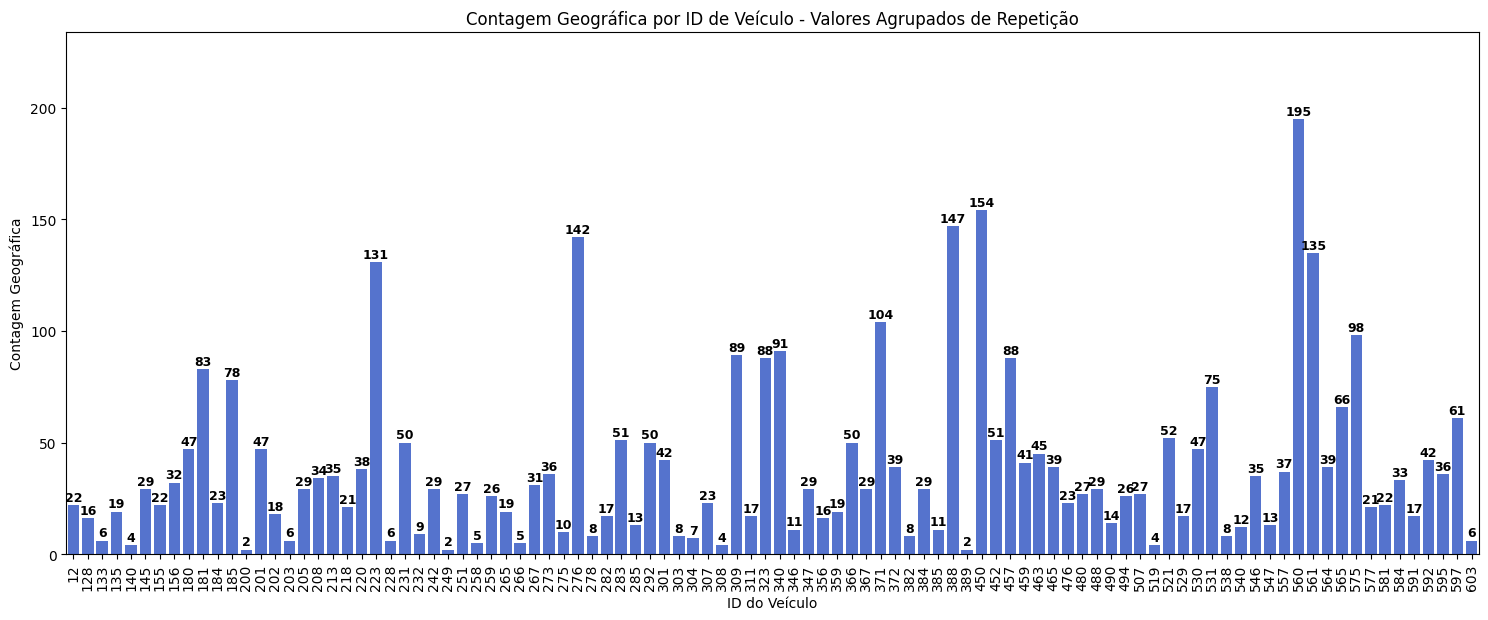

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Primeiro, agregamos os dados para obter o máximo por VehId
df_max = df.groupby('VehId')['contagem'].sum().reset_index()

# Verificamos os valores máximos
print(f"Valor máximo geral: {df_max['contagem'].sum()}")
print("Top 5 valores somados-agrupados:")
print(df_max.sort_values('contagem', ascending=False).head())

# Configurando o tamanho da figura
plt.figure(figsize=(15, 8))

# Usando seaborn para o gráfico, mas com nossos dados pré-agregados
ax = sns.barplot(x='VehId', y='contagem', data=df_max, color='royalblue', errorbar=None)

# Aumentar os limites do eixo y para garantir espaço para os textos
y_max = df_max['contagem'].max()
ax.set_ylim(0, y_max * 1.2)

# Obter as barras do gráfico
bars = ax.patches

# Adicionar os valores sobre as barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5,
            str(int(height)),  # Convertendo para inteiro para remover casas decimais
            ha='center', va='bottom', fontsize=9, fontweight='bold')

# Melhorando as etiquetas e título
plt.xlabel('ID do Veículo')
plt.ylabel('Contagem Geográfica')
plt.title('Contagem Geográfica por ID de Veículo - Valores Agrupados de Repetição')

# Ajustando a rotação dos rótulos no eixo x para melhor legibilidade
plt.xticks(rotation=90)

# Ajustando o layout para evitar cortes
plt.tight_layout()

# Ajustando especificamente o espaço inferior para os rótulos
plt.subplots_adjust(bottom=0.3)

# Exibindo o gráfico
plt.show()

In [18]:
import pandas as pd
import numpy as np
import math

def generate_latex_table(df, n_columns=3, caption="Contagem Geográfica por ID de Veículo - Valores Agrupados de Repetição"):
    """
    Gera código LaTeX para tabela de contagem por veículo.

    Parâmetros:
    -----------
    df : pandas DataFrame
        DataFrame com colunas 'VehId' e 'contagem'
    n_columns : int
        Número de colunas principais na tabela
    caption : str
        Título da tabela

    Retorna:
    --------
    str
        Código LaTeX da tabela
    """
    # Ordenar o DataFrame pelo ID do veículo
    df = df.sort_values('VehId')

    # Calcular quantas linhas cada coluna terá
    total_rows = len(df)
    rows_per_col = math.ceil(total_rows / n_columns)

    # Iniciar o código LaTeX
    latex_code = []
    latex_code.append("\\begin{table}[H]")
    latex_code.append("\\centering")
    latex_code.append(f"\\caption{{{caption}}}")

    # Definir o formato da tabela
    col_format = "|"
    for i in range(n_columns):
        if i < n_columns - 1:
            col_format += "l|c||"
        else:
            col_format += "l|c|"
    latex_code.append(f"\\begin{{tabular}}{{{col_format}}}")

    # Adicionar cabeçalho
    latex_code.append("\\hline")
    header = "\\rowcolor[gray]{0.8} "
    for i in range(n_columns):
        if i < n_columns - 1:
            header += "\\textbf{Veículo} & \\textbf{Contagem} & "
        else:
            header += "\\textbf{Veículo} & \\textbf{Contagem}"
    latex_code.append(header + " \\\\ \\hline")

    # Dividir os dados em colunas
    for row_idx in range(rows_per_col):
        line = ""
        for col_idx in range(n_columns):
            idx = col_idx * rows_per_col + row_idx
            if idx < total_rows:
                veh_id = df.iloc[idx]['VehId']
                count = df.iloc[idx]['contagem']
                if col_idx < n_columns - 1:
                    line += f"{veh_id} & {count} & "
                else:
                    line += f"{veh_id} & {count}"
            else:
                # Células vazias, preenchidas corretamente com espaços
                if col_idx < n_columns - 1:
                    line += " & & "
                else:
                    line += " & "

        # Remover o último " & " se necessário (mas manter a célula vazia se for o último item)
        if line.endswith(" & "):
            line = line[:-1]  # Remove apenas o espaço final, mantendo o "&"

        latex_code.append(line + " \\\\ \\hline")

    # Fechar a tabela
    latex_code.append("\\end{tabular}")
    latex_code.append("\\caption*{Fonte: Elaborado pelo autor (2025).}")
    latex_code.append("\\end{table}")

    # Retornar o código LaTeX
    return "\n".join(latex_code)

# Exemplo de uso com dados de teste:
# Crie um DataFrame de exemplo com seus veículos e contagens
# veiculos = [128, 133, 135, 140, 145, 155, 156, 180, 184, 185]  # Exemplo de IDs
# contagens = [22, 16, 19, 6, 4, 29, 22, 32, 47, 83]  # Exemplo de contagens
# df = pd.DataFrame({'VehId': veiculos, 'contagem': contagens})
#
# latex_table = generate_latex_table(df)
# print(latex_table)
#
# # Para salvar em um arquivo:
# with open('tabela_latex.tex', 'w') as f:
#     f.write(latex_table)

In [19]:
# Exemplo de uso:
latex_table = generate_latex_table(df_max)
latex_table

# Para salvar em um arquivo:
# with open('tabela_latex.tex', 'w') as f:
#     f.write(latex_table)

'\\begin{table}[H]\n\\centering\n\\caption{Contagem Geográfica por ID de Veículo - Valores Agrupados de Repetição}\n\\begin{tabular}{|l|c||l|c||l|c|}\n\\hline\n\\rowcolor[gray]{0.8} \\textbf{Veículo} & \\textbf{Contagem} & \\textbf{Veículo} & \\textbf{Contagem} & \\textbf{Veículo} & \\textbf{Contagem} \\\\ \\hline\n12 & 22 & 273 & 36 & 459 & 41 \\\\ \\hline\n128 & 16 & 275 & 10 & 463 & 45 \\\\ \\hline\n133 & 6 & 276 & 142 & 465 & 39 \\\\ \\hline\n135 & 19 & 278 & 8 & 476 & 23 \\\\ \\hline\n140 & 4 & 282 & 17 & 480 & 27 \\\\ \\hline\n145 & 29 & 283 & 51 & 488 & 29 \\\\ \\hline\n155 & 22 & 285 & 13 & 490 & 14 \\\\ \\hline\n156 & 32 & 292 & 50 & 494 & 26 \\\\ \\hline\n180 & 47 & 301 & 42 & 507 & 27 \\\\ \\hline\n181 & 83 & 303 & 8 & 519 & 4 \\\\ \\hline\n184 & 23 & 304 & 7 & 521 & 52 \\\\ \\hline\n185 & 78 & 307 & 23 & 529 & 17 \\\\ \\hline\n200 & 2 & 308 & 4 & 530 & 47 \\\\ \\hline\n201 & 47 & 309 & 89 & 531 & 75 \\\\ \\hline\n202 & 18 & 311 & 17 & 538 & 8 \\\\ \\hline\n203 & 6 & 323 & 8